In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

## Problem 1

### Making random dataset for classification

In [2]:
X, y = make_classification(n_samples = 2000, n_features = 2, n_redundant = 0, n_informative = 1,
                        n_clusters_per_class = 1, random_state = 3,
                        class_sep = 2, flip_y = 0.1, n_classes = 2)

In [3]:
data = pd.DataFrame(data = np.c_[X, y])
data.head()

,0,1,2
0,-1.653148,-2.036685,0.0
1,-0.458612,-2.095498,0.0
2,1.486651,-1.888864,0.0
3,-0.241126,-2.040498,0.0
4,-2.249821,2.571902,1.0


### Plotting data by colored classes

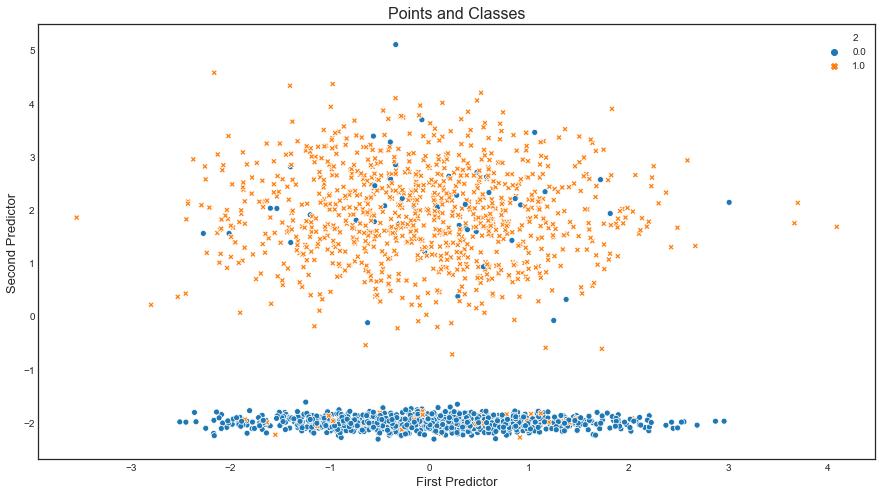

In [4]:
plt.figure(figsize = (15,8))
plt.title("Points and Classes", fontsize = 16)
sns.scatterplot(0, 1, hue = 2, data = data, style = 2)
plt.xlabel("First Predictor", fontsize = 13)
plt.ylabel("Second Predictor", fontsize = 13)
plt.show()

### Logistic Regression

In [5]:
model = LogisticRegression(solver = "lbfgs")
model.fit(X, y)
model.score(X, y)

0.949

### Drawing the decision boundary

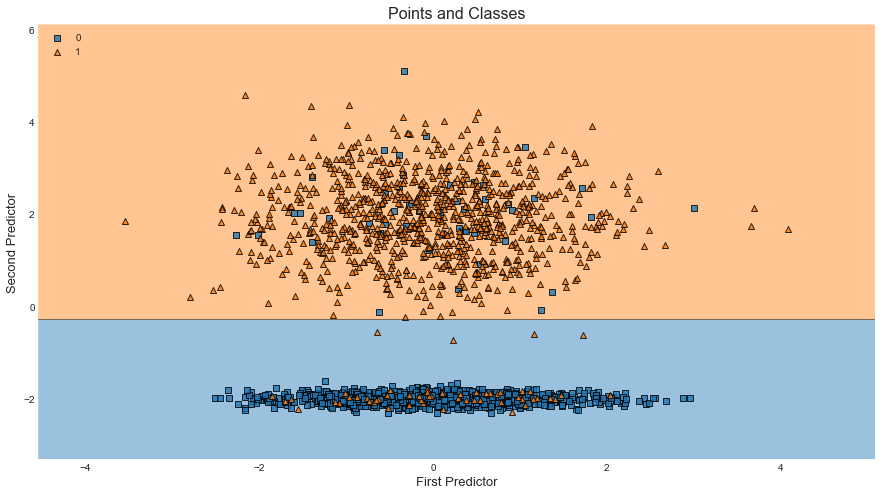

In [6]:
plt.figure(figsize = (15,8))
plt.title("Points and Classes", fontsize = 16)
plot_decision_regions(X, y, clf = model, legend = 2)
plt.xlabel("First Predictor", fontsize = 13)
plt.ylabel("Second Predictor", fontsize = 13)
plt.show()

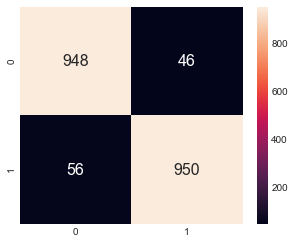

In [7]:
y_pred = model.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 16}, fmt = "g")
plt.show()

Confusion matrix shows us that we have correctly classified 948 True-Negative and 950 True-Positive values of the training set.

In [8]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       994
           1       0.95      0.94      0.95      1006

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



From the classification report we can see that 94% (precision) of the first class were classified correctly, recall of the first class shows that the model identified 95% of all first class samples of the data. Precision of the second class shows that 95% of the second class was classified correctly and the recall states that 94% of all second class samples were correctly identified by the model.

We can see that the dataset is balanced in the "support" column of the report, since the number of 0's is 994 and the number of 1's is 1006 (numbers are pretty close to each other).

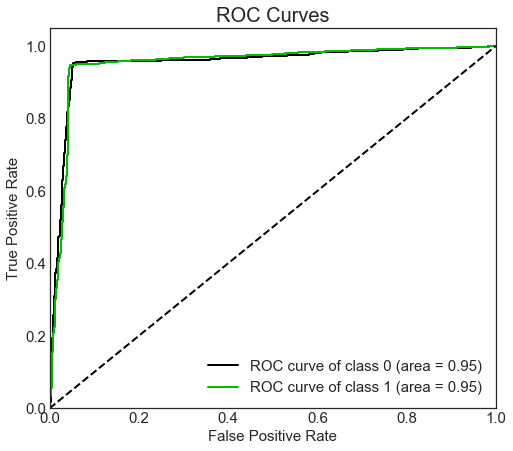

In [9]:
y_probs = model.predict_proba(X)
fpr_0, tpr_0, thresholds_0 = roc_curve(y, y_probs[:, 1], pos_label = 1)
auc_1_sklearn = auc(fpr_0, tpr_0)

plot_roc(y, y_probs, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False)
plt.show()

In [10]:
auc_1_sklearn

0.9526072938625791

From the ROC Curves of the classes we can see the change of FPR and TPR relative to the threshold of the classification algorithm. Both classes output almost the same AUC of 0.95, which means that we have a quite high True-Positive rate for both classes.

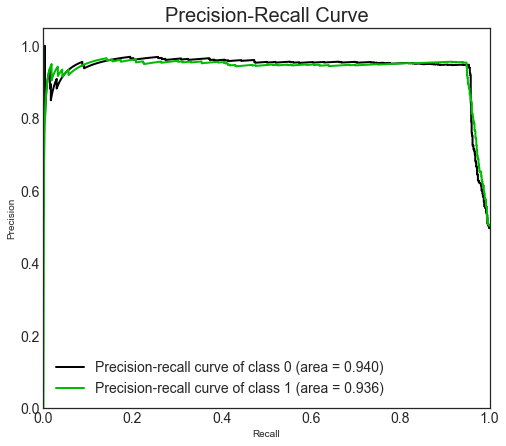

In [11]:
plot_precision_recall(y, y_probs, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False)
plt.show()

From above Precision-Recall curve we can see the relationship between correctly classified (Precision) and identified (Recall) samples for the two classes, which states that over 94% (AUCPR of 0 class) of 0 class were identified both correctly and completely and over 93% (AUCPR) of 1 class were identified both correctly and completely.

## Problem 2

### Making random dataset for classification with 3 classes

In [12]:
X, y = make_classification(n_samples = 2000, n_features=2, n_redundant=0, n_informative=2,
        n_clusters_per_class=1, random_state=3, class_sep=3, flip_y=0.1, n_classes=3)

In [13]:
data_1 = pd.DataFrame(data = np.c_[X, y])
data_1["hue"] = pd.to_numeric(data_1[2], downcast = "signed")
data_1

,0,1,2,hue
0,-3.336990,-3.404892,2.0,2
1,-2.877038,-2.773751,2.0,2
2,2.968147,-2.958021,1.0,1
3,6.125041,2.930907,1.0,1
4,2.730844,2.071666,0.0,0
...,...,...,...,...
1995,3.182197,1.958557,0.0,0
1996,2.983085,-2.674943,1.0,1
1997,-2.691292,-2.568913,2.0,2
1998,-4.795542,-5.390246,2.0,2


In [14]:
data_1[2].value_counts()

1.0    676
2.0    666
0.0    658
Name: 2, dtype: int64

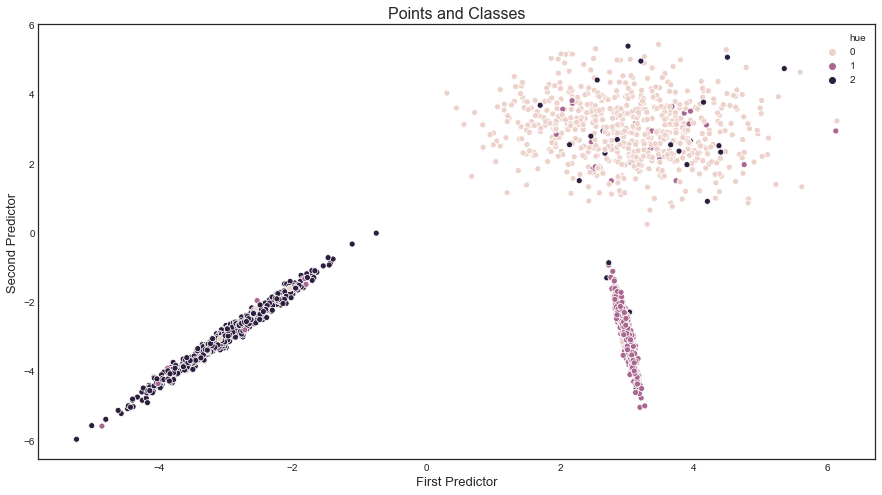

In [15]:
plt.figure(figsize = (15,8))
plt.title("Points and Classes", fontsize = 16)
sns.scatterplot(x = 0, y = 1, hue = "hue", data = data_1)
plt.xlabel("First Predictor", fontsize = 13)
plt.ylabel("Second Predictor", fontsize = 13)
plt.show()

In [16]:
model_1 = LogisticRegression()
model_1.fit(X, y)
accuracy_2_sklearn = model_1.score(X, y)
accuracy_2_sklearn

0.9365

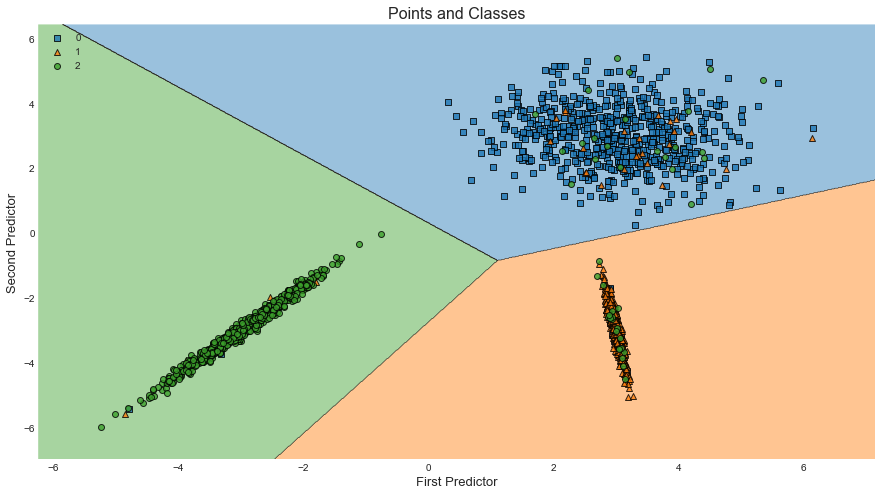

In [17]:
plt.figure(figsize = (15,8))
plt.title("Points and Classes", fontsize = 16)
plt.xlabel("First Predictor", fontsize = 13)
plt.ylabel("Second Predictor", fontsize = 13)
plot_decision_regions(X, y, clf = model_1, legend = 2)
plt.show()

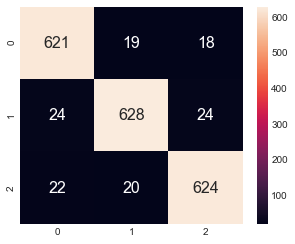

In [18]:
y_pred = model_1.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 16}, fmt = "g")
plt.show()

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       658
           1       0.94      0.93      0.94       676
           2       0.94      0.94      0.94       666

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



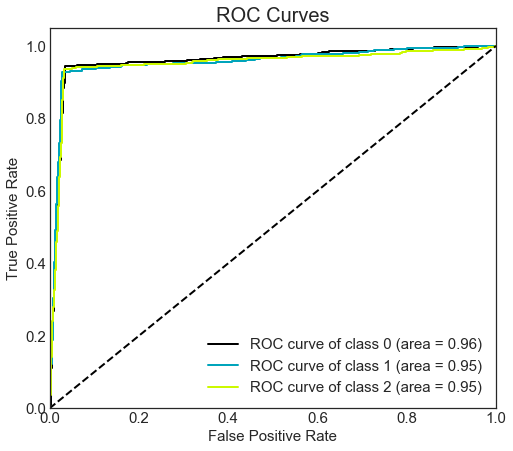

In [20]:
y_probs = model_1.predict_proba(X)

fpr_1, tpr_1, thresholds_1 = roc_curve(y, y_probs[:, 2], pos_label = 2)
auc_2_sklearn = auc(fpr_1, tpr_1)

plot_roc(y, y_probs, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False)
plt.show()

In [21]:
auc_2_sklearn

0.9505967736852293

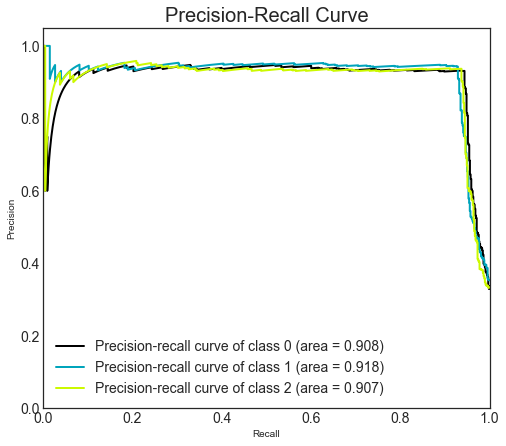

In [22]:
plot_precision_recall(y, y_probs, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False)
plt.show()

From the classification report we can see that we do not have class-inbalance problem, since we have 658, 676 and 666 numbers of samples for 0, 1 and 2 respectively. With accuracy over 94% and precision-recall information obtained from the classification report, we can conclude that the categories are giving as high precision and recall with over 94%, AUC of 95% and AUCPR of 90%, 91% and 90% for 0,1 and 2 classes respectively.

The following model is acceptable for all classes.

## Problem 4

In [23]:
X, y = make_classification(n_samples = 2000, n_features = 2, n_redundant = 0, n_informative = 1,
                        n_clusters_per_class = 1, random_state = 3,
                        class_sep = 2, flip_y = 0.1, n_classes = 2)

In [24]:
y = y.reshape(y.shape[0], 1)
y.shape

(2000, 1)

In [25]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "Response"])
data["Response"] = data['Response'].astype(np.int64)
data.head()

,A,B,Response
0,-1.653148,-2.036685,0
1,-0.458612,-2.095498,0
2,1.486651,-1.888864,0
3,-0.241126,-2.040498,0
4,-2.249821,2.571902,1


In [26]:
data[["A", "B"]] = X
data["Response"] = y

model_2 = sm.Logit(y, X)
result = model_2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.224988
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.6754
Time:                        00:14:38   Log-Likelihood:                -449.98
converged:                       True   LL-Null:                       -1386.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0120      0.092     -0.130      0.896      -0.193       0.169
x2             1.4860      0.055     27.057      0.000       1.378       1.594
==============================================================================
"""

In [27]:
y_pred = (result.predict(X) >= 0.5).astype(int)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

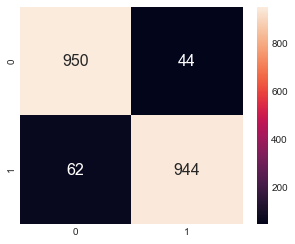

In [28]:
conf_matrix = result.pred_table()

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, annot_kws = {"size": 16}, fmt = "g")
plt.show()

In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       994
           1       0.96      0.94      0.95      1006

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [30]:
y_proba = result.predict(X)
fpr, tpr, thresholds = roc_curve(y, y_proba, pos_label = 1)
auc_logit = auc(fpr, tpr)

print("AUC of Logit (first dataset): %0.2f" % auc_logit)
print("AUC of LogisticRegression (first dataset): %0.2f" % auc_1_sklearn)

AUC of Logit (first dataset): 0.95
AUC of LogisticRegression (first dataset): 0.95


### Comparing results from second dataset

In [31]:
X, y = make_classification(n_samples = 2000, n_features=2, n_redundant=0, n_informative=2,
        n_clusters_per_class=1, random_state=3, class_sep=3, flip_y=0.1, n_classes=3)

In [32]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "Response"])
data["Response"] = data['Response'].astype(np.int64)
data.head()

,A,B,Response
0,-3.336990,-3.404892,2
1,-2.877038,-2.773751,2
2,2.968147,-2.958021,1
3,6.125041,2.930907,1
4,2.730844,2.071666,0


In [33]:
data[["A", "B"]] = X
data["Response"] = y

model_3 = sm.MNLogit(y, X)
result_mn = model_3.fit()
result_mn.summary()

Optimization terminated successfully.
         Current function value: 0.323709
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                        MNLogit   Df Residuals:                     1996
Method:                           MLE   Df Model:                            2
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.7053
Time:                        00:14:38   Log-Likelihood:                -647.42
converged:                       True   LL-Null:                       -2197.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1267      0.037      3.430      0.001       0.054       0.199
x2            -1.0047      0.045    -22.284      0.000      -1.093      -0.916
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8429      0.056    -15.144      0.000      -0.952      -0.734
x2            -0.8197      0.061    -13.533      0.000      -0.938      -0.701
==============================================================================
"""

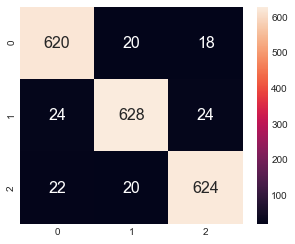

In [34]:
conf_matrix = result_mn.pred_table()

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, annot_kws = {"size": 16}, fmt = "g")
plt.show()

In [35]:
logit_accuracy = np.diag(conf_matrix).sum()/conf_matrix.sum()
print("Logit accuracy is: ", logit_accuracy)
print("LogisticRegression accuracy is: ", accuracy_2_sklearn)

Logit accuracy is:  0.936
LogisticRegression accuracy is:  0.9365


## Problem 5

In [36]:
X, y = make_classification(n_samples = 2000, n_features = 2, n_redundant = 0, n_informative = 1,
                        n_clusters_per_class = 1, random_state = 3,
                        class_sep = 2, flip_y = 0.1, n_classes = 2)

In [37]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Cs

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [38]:
logreg_cv = LogisticRegressionCV(Cs = Cs, cv = 10, scoring = "accuracy")
logreg_cv.fit(X, y)
logreg_cv.score(X, y)

0.949

In [39]:
print("Optimal C parameter is:",logreg_cv.C_[0])

Optimal C parameter is: 0.1


In [40]:
y_pred = logreg_cv.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       994
           1       0.95      0.94      0.95      1006

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

